In [ ]:
#MODELOS ARIMA Y ARCH (INTELIGENCIA PARA LOS NEGOCIOS)

In [ ]:
## Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
from datetime import datetime


In [ ]:
# Importando de Excel a Python

In [ ]:
file = "/content/IPC_BANX.xlsx" ## forma resumida a través de la carpeta en Colab

In [ ]:
TC = pd.read_excel (file, sheet_name = "IPC_GEN") ## El archivo con extensión .ipynb se llamará "TC"

In [ ]:
##Convirtiendo el archivo en un data frame
inflacion = pd.DataFrame(TC)
inflacion

,FECHA,IPC
0,2010-01-01,72.552046
1,2010-02-01,72.971671
2,2010-03-01,73.489725
3,2010-04-01,73.255565
4,2010-05-01,72.793978
...,...,...
166,2023-11-01,131.445000
167,2023-12-01,132.373000
168,2024-01-01,133.555000
169,2024-02-01,133.681000


In [ ]:
##Gestión de fechas para trabajar una serie de tiempo
import pandas as pd
import datetime
inflacion["FECHA"] = pd.to_datetime(inflacion["FECHA"])
## Recuerda que el frame se nombra como "inflacion"

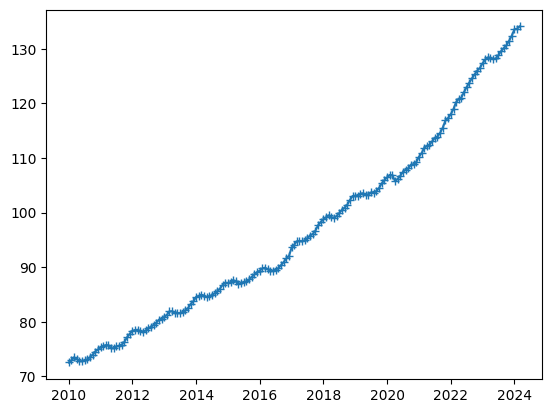

In [ ]:
# Iniciando con gráficos
plt.plot(inflacion["FECHA"],inflacion['IPC'], marker="+")

In [ ]:
## Graficando la serie de tiempo "IPC"
import plotly.express as px
tendencia = px.line(inflacion, x = "FECHA", y = "IPC")
tendencia.show()

In [ ]:
## Transformando el frame a una serie de tiempo



In [ ]:
inflacion_ts = inflacion["IPC"]

In [ ]:
print(inflacion_ts)

FECHA
2010-01-01     72.552046
2010-02-01     72.971671
2010-03-01     73.489725
2010-04-01     73.255565
2010-05-01     72.793978
                 ...    
2023-11-01    131.445000
2023-12-01    132.373000
2024-01-01    133.555000
2024-02-01    133.681000
2024-03-01    134.065000
Name: IPC, Length: 171, dtype: float64


In [ ]:
## Modelo sin IA:

# Estimar un modelo ARIMA
# De la librería "statsmodels.tsa.arima.model" importar la opción ARIMA

from statsmodels.tsa.arima.model import ARIMA

# Definiendo el modelo ARIMA (recordar que debe ser estacionaria, de lo contrario diferenciar)
model = ARIMA(inflacion_ts, order=(5, 1, 0))
results = model.fit()

# Haciendo la predicción por 12 meses.
predictions = results.predict(start=len(inflacion_ts), end=len(inflacion_ts) + 12)
predictions


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



2024-04-01    134.509977
2024-05-01    134.960560
2024-06-01    135.241539
2024-07-01    135.498083
2024-08-01    135.744855
2024-09-01    135.974298
2024-10-01    136.162528
2024-11-01    136.326019
2024-12-01    136.472844
2025-01-01    136.604488
2025-02-01    136.718945
2025-03-01    136.819016
2025-04-01    136.907420
Freq: MS, Name: predicted_mean, dtype: float64

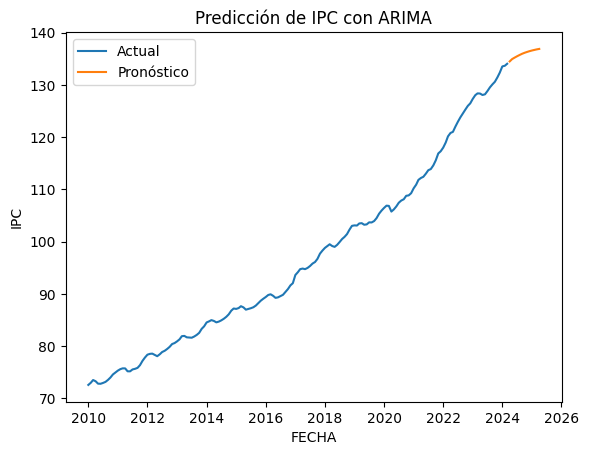

In [ ]:
# Graficar la prediccion
plt.plot(inflacion, label='Actual')
plt.plot(predictions, label='Pronóstico')
plt.title('Predicción de IPC con ARIMA')
plt.xlabel('FECHA')
plt.ylabel('IPC')
plt.legend()
plt.show()

Ahora veámos que nos dice la **IA** ✌

In [ ]:
# prompt: ARIMA

# Definiendo el modelo ARIMA (recordar que debe ser estacionaria, de lo contrario diferenciar)
model = ARIMA(inflacion_ts, order=(5, 1, 0))
results = model.fit()

# Haciendo la predicción por 12 meses.
predictions = results.predict(start=len(inflacion_ts), end=len(inflacion_ts) + 12)

# Graficar la prediccion
plt.plot(inflacion, label='Actual')
plt.plot(predictions, label='Pronóstico')
plt.title('Predicción de IPC con ARIMA')
plt.xlabel('FECHA')
plt.ylabel('IPC')
plt.legend()
plt.show()


**¿y si queremos observar intervalos específicos de la serie?**

<Axes: xlabel='FECHA'>

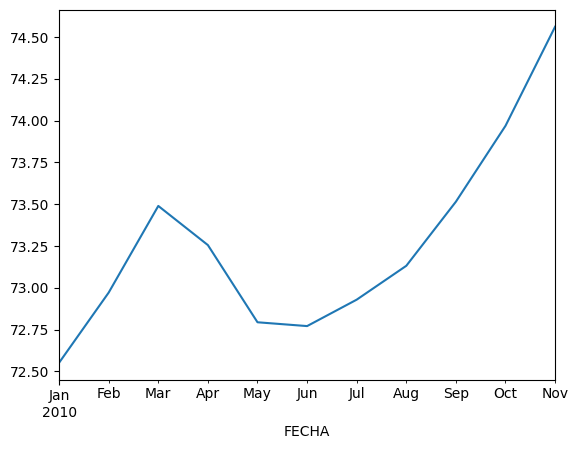

In [ ]:
inflacion_ts.loc["2010-01-01" : "2010-11-01"].plot()

**Veámos modelos de Volatilidad**

In [ ]:
#Trabajaremos con valores de Yahoo Finance
import yfinance as yf
symbol = "WBD"
warner = yf.download(symbol, start = "2023-05-05", end = "2024-05-05")
print(warner)

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-05-05  11.81  12.96  11.63  12.89      12.89  43776200
2023-05-08  13.00  13.55  12.80  13.46      13.46  20909500
2023-05-09  13.31  13.50  13.25  13.41      13.41  20611200
2023-05-10  13.55  13.56  12.69  13.04      13.04  21790000
2023-05-11  12.82  12.88  12.34  12.38      12.38  20095200
...           ...    ...    ...    ...        ...       ...
2024-04-29   8.18   8.30   8.11   8.15       8.15  17655400
2024-04-30   8.07   8.12   7.35   7.36       7.36  83395800
2024-05-01   7.35   7.81   7.34   7.62       7.62  43588100
2024-05-02   7.67   8.01   7.65   7.95       7.95  36795700
2024-05-03   8.00   8.28   7.91   7.97       7.97  35712311

[251 rows x 6 columns]


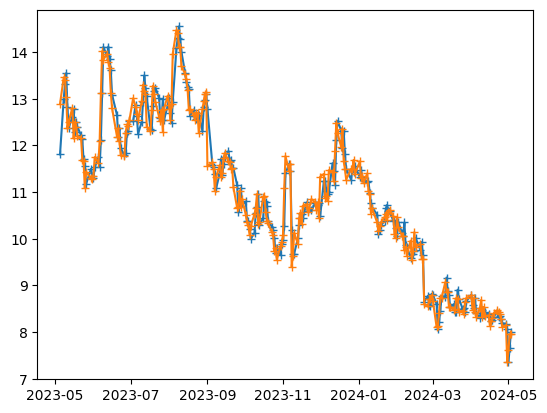

In [ ]:
plt.plot(warner["Open"], marker="+")
plt.plot(warner["Close"], marker="+")

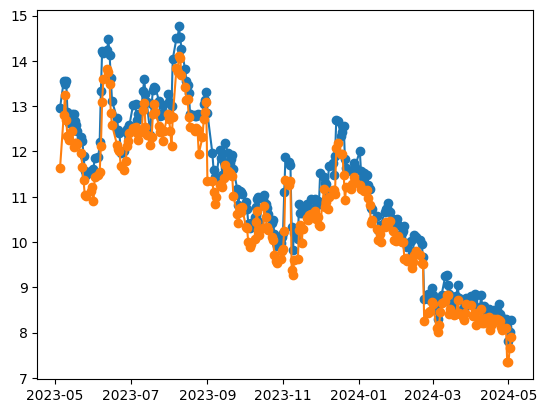

In [ ]:
plt.plot(warner["High"], marker="o")
plt.plot(warner["Low"], marker="o")

In [ ]:
## Ojo a los datos simples
estadisticos = warner.describe()
print(estadisticos)

             Open       High         Low       Close   Adj Close        Volume
count  251.000000  251.00000  251.000000  251.000000  251.000000  2.510000e+02
mean    10.951952   11.16749   10.731155   10.944183   10.944183  2.356127e+07
std      1.650797    1.69420    1.604722    1.660180    1.660180  1.167492e+07
min      7.350000    7.81000    7.340000    7.360000    7.360000  6.786100e+06
25%      9.880000   10.09000    9.630000    9.840000    9.840000  1.662400e+07
50%     11.000000   11.18000   10.780000   10.970000   10.970000  2.039700e+07
75%     12.320000   12.60500   12.120000   12.335000   12.335000  2.766210e+07
max     14.550000   14.76000   14.110000   14.470000   14.470000  9.820690e+07


In [ ]:
#Hallar retorno
OPEN = warner[['Open']]
retorno = OPEN.pct_change().dropna()
print(retorno)

                Open
Date                
2023-05-08  0.100762
2023-05-09  0.023846
2023-05-10  0.018032
2023-05-11 -0.053875
2023-05-12 -0.034321
...              ...
2024-04-29 -0.001221
2024-04-30 -0.013448
2024-05-01 -0.089219
2024-05-02  0.043537
2024-05-03  0.043025

[250 rows x 1 columns]


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

In [ ]:
log_retorno = np.log(OPEN / OPEN.shift(1)).dropna()
print(log_retorno.head())

                Open
Date                
2023-05-08  0.096003
2023-05-09  0.023566
2023-05-10  0.017871
2023-05-11 -0.055380
2023-05-12 -0.034924


In [ ]:
# ARCH model
model = arch_model(log_retorno, mean="constant", vol="GARCH", p=1, q=1)
results = model.fit(disp="off")
print(results.summary())

# Pronóstico de la volatilidad
forecast_horizon = 10
forecasts = results.forecast(horizon=forecast_horizon)
print(forecasts.variance.head())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009138. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Open   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                521.951
Distribution:                  Normal   AIC:                          -1035.90
Method:            Maximum Likelihood   BIC:                          -1021.82
                                        No. Observations:                  250
Date:                Sun, May 05 2024   Df Residuals:                      249
Time:                        23:31:32   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.2184e-03  2.024e-03     -1.096      0.

**Opcional:**

In [ ]:
## Mas sencillo ...
model = arch_model(retorno, vol='ARCH')
model_fit = model.fit()
print(model_fit.summary())
forecasts = model_fit.forecast(horizon=5)


Iteration:      1,   Func. Count:      5,   Neg. LLF: 1915160.7771577423
Iteration:      2,   Func. Count:     15,   Neg. LLF: -335.12292604023366
Iteration:      3,   Func. Count:     22,   Neg. LLF: -495.8076938228737
Iteration:      4,   Func. Count:     28,   Neg. LLF: -521.5751504003779
Iteration:      5,   Func. Count:     33,   Neg. LLF: -521.5814444834236
Iteration:      6,   Func. Count:     36,   Neg. LLF: -521.5814444834425
Optimization terminated successfully    (Exit mode 0)
            Current function value: -521.5814444834236
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   Open   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                521.581
Distribution:                  Normal

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009128. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
print(forecasts.mean.iloc[-1])
print(forecasts.variance.iloc[-1])

h.1   -0.00182
h.2   -0.00182
h.3   -0.00182
h.4   -0.00182
h.5   -0.00182
Name: 2024-05-03 00:00:00, dtype: float64
h.1    0.001109
h.2    0.000963
h.3    0.000939
h.4    0.000936
h.5    0.000935
Name: 2024-05-03 00:00:00, dtype: float64
